# JEFFREY ARUNASALAM #100783993

# Import Initial Libraries

In [39]:
import numpy as np#import libraries
import os
import cv2
import pandas as pd
import glob
from imutils import paths
from PIL import Image, ImageDraw, ImageFont
from skimage import feature
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits import mplot3d
from stl import mesh
import math
import keras
from keras.datasets import mnist#testing
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D

In [2]:
pwd

'C:\\Users\\ARUNASALAM'

The general proposal is creating an AI web client that Create a 3-dimensional equivalent object from analyzing the 2-dimensional image inputted. [3D PORTRAIT OF 2D IMAGE]

# EDA (Exploration Data Analysis)

output object (.stl format, top) and bottom (image from dataset) 

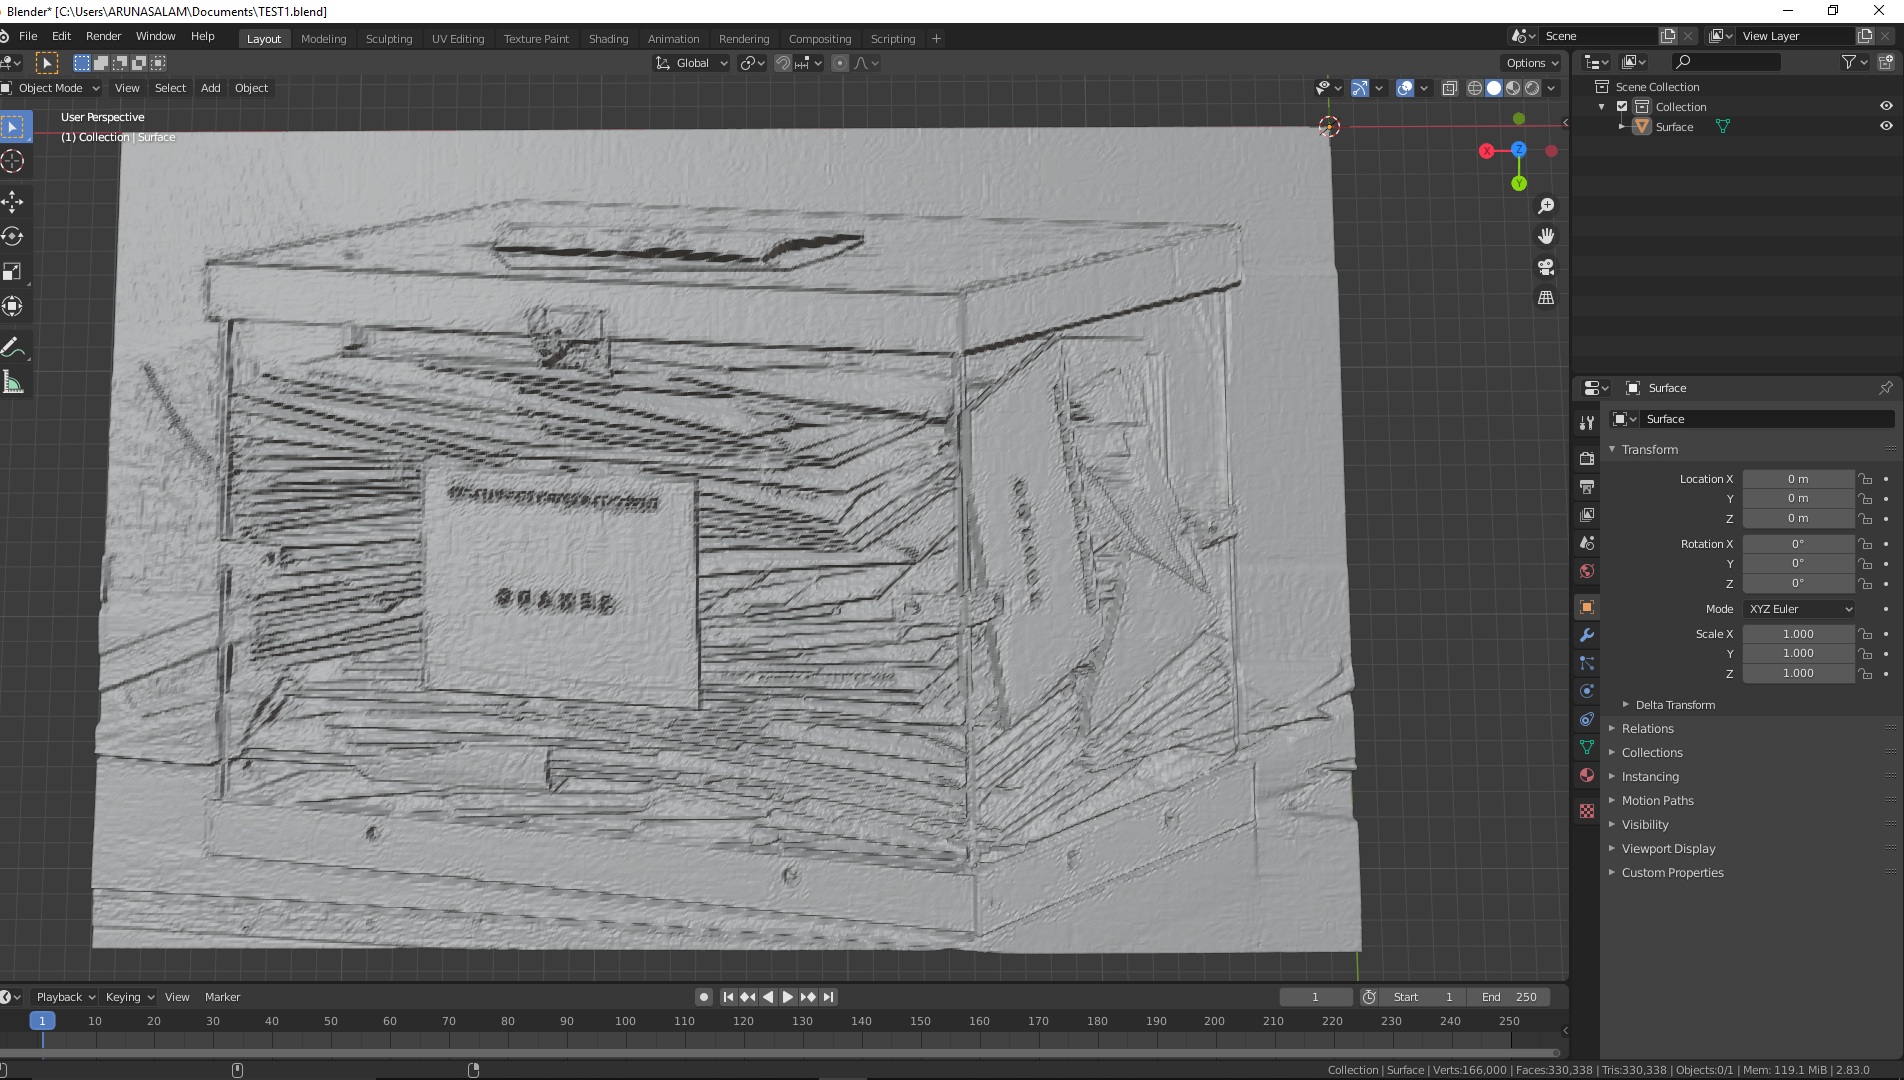

In [40]:
dataset = list(paths.list_images(r"C:\Users\ARUNASALAM\Desktop\image_dataset\img"))#dataset directory

In [41]:
test_array = cv2.imread(dataset[1])#image data is imported as an array Desktop\image_dataset
print(test_array)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


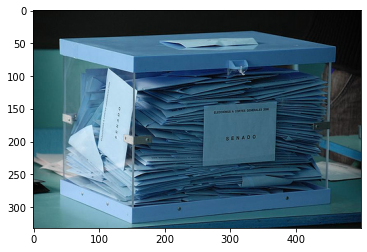

In [42]:
for img in dataset:#testing images being uploaded onto notebook..
    test_dataset = cv2.imread(img)#image data is imported as an array
    plt.imshow(test_dataset, cmap="gray")
    plt.show()
    break

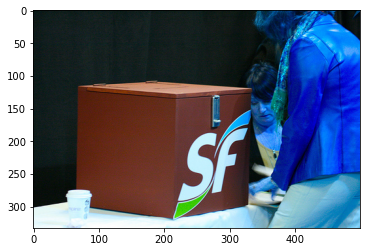

In [43]:
test_array = cv2.imread(dataset[9])#image data is imported as an array
canny = cv2.Canny(test_array, 500, 500)
plt.imshow(np.asarray(test_array))


In [44]:
titles = ['images', 'edges']

In [45]:
images = [test_array, canny]

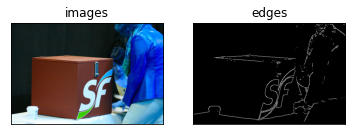

In [46]:
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]) ,plt.yticks([])

In [47]:
training_data = []
size = 500, 500#standardize sizes

def trainingdata():
    try:
       for pictures in dataset:
            img_array = cv2.imread(pictures)#image data is imported as an array
            im = Image.fromarray(img_array).convert('L')#convert array data to pil, convert to gray scale
            im.thumbnail(size)#standardize sizing
            pics_storage = np.asarray(im)#convert to numpy array
            training_data.append([pics_storage])#add image data in np array to training_data
    except Exception as e:
            print("Image is corrupted: ", img_array)
        
trainingdata()

Above function sets the parameters for the dataset. 
Breakdown of data:
-images are standardized to 500 by 500 pixels
-turned gray (grayscale) 

First the images are imported to numpy arrays by cv2, converted to images by pillow & grey-scaled, then converted back to numpy arrays.

If an image is corrupted, trigger the try exception catch, and display the image that was doing it...

Getting the number of images in the dataset..

In [5]:
print(len(training_data))#getting the number of images processed; should be 11657 images

11657


In [4]:
labels = pd.read_fwf('train.txt')#text file with the image set (has the names of the images)

In [5]:
labels.shape

(8182, 1)

In [6]:
labels.head(15)#the text files have the names of the images, just listing them here; not in usage

,bal_00001
0,bal_00002
1,bal_00004
2,bal_00005
3,bal_00006
4,bal_00008
5,bal_00009
6,bal_00012
7,bal_00014
8,bal_00015
9,bal_00016


In [24]:
labels.describe()

,bal_00001
count,8182
unique,4464
top,cylinder_
freq,2266


In [26]:
labels.dtypes

bal_00001    object
dtype: object

In [5]:
training_data#all the images in numpy array format

[[array([[ 14,  13,  13, ...,   5,   4,   3],
         [ 14,  14,  14, ...,   5,   4,   3],
         [ 14,  14,  14, ...,   5,   4,   3],
         ...,
         [ 99, 105, 109, ...,  10,  10,  10],
         [ 99, 103, 104, ...,  12,  12,  12],
         [101, 100,  99, ...,  13,  13,  13]], dtype=uint8)],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)],
 [array([[ 47,  47,  47, ...,  55,  55,  55],
         [ 47,  47,  47, ...,  54,  54,  54],
         [ 47,  47,  47, ...,  54,  54,  54],
         ...,
         [122, 124, 126, ..., 124, 121, 118],
         [123, 123, 124, ..., 130, 126, 123],
         [123, 123, 123, ..., 129, 127, 125]], dtype=uint8)],
 [array([[113, 113, 112, ...,  34,  25,  27],
         [114, 115, 115, ...,  39,  

IMAGE ARRAY FORMAT --------- [IMAGE#][X][Y]

Saving the initial dataset, so you don't have to keep rerunning the above sequences

In [6]:
import pickle 

pickle_out = open("imagestorage.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

This is a quick way to load the dataset now.

In [7]:
pickle_in = open("imagestorage.pickle","rb")
training_data = pickle.load(pickle_in)

-using 2d image upscaling to create an image from ml, then turn the output to a portrait (3d model)-

In [25]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 25
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

In [26]:
#img_folder = r"\Users\ARUNASALAM\Desktop\image_dataset"
#IMG_WIDTH=28
#IMG_HEIGHT=28

using example ml model from keras: 

In [27]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [28]:
# Create the model
model = Sequential()
model.add(Conv2D(8, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (2, 2), strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(8, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Conv2D(8, (2, 2), activation='relu'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Conv2D(8, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Conv2D(1, (2, 2), activation='sigmoid', padding='same'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         40        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         264       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           264       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 8)           264       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 8, 8, 8)          

In [29]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(input_train, input_train,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

Epoch 1/25
1920/1920 [==============================] - 26s 13ms/step - loss: 0.2227 - val_loss: 0.1710
Epoch 2/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1619 - val_loss: 0.1568
Epoch 3/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1520 - val_loss: 0.1496
Epoch 4/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1463 - val_loss: 0.1447
Epoch 5/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1421 - val_loss: 0.1422
Epoch 6/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1389 - val_loss: 0.1386
Epoch 7/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1366 - val_loss: 0.1369
Epoch 8/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1348 - val_loss: 0.1358
Epoch 9/25
1920/1920 [==============================] - 25s 13ms/step - loss: 0.1331 - val_loss: 0.1333
Epoch 10/25
1920/1920 [==============================] - 24s 13m

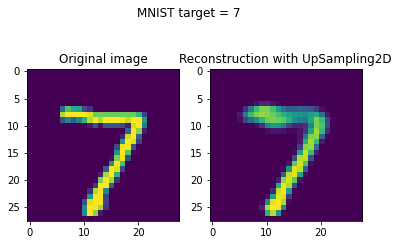

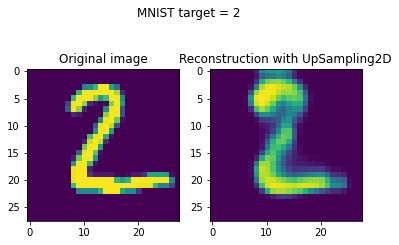

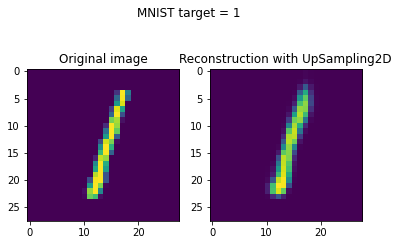

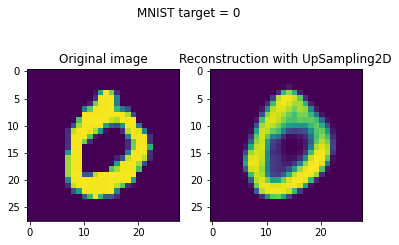

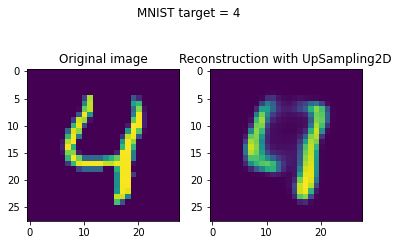

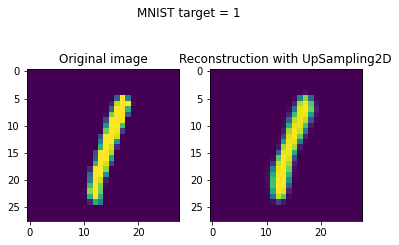

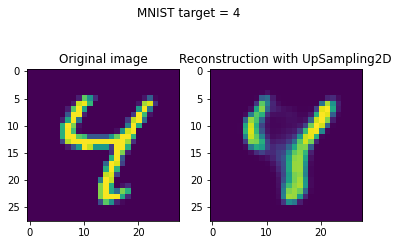

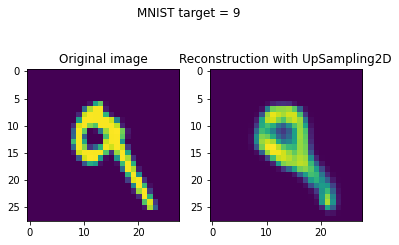

In [30]:
# Generate reconstructions
num_reconstructions = 8
samples = input_test[:num_reconstructions]
targets = target_test[:num_reconstructions]
reconstructions = model.predict(samples)

# Plot reconstructions
for i in np.arange(0, num_reconstructions):
  # Get the sample and the reconstruction
  sample = samples[i][:, :, 0]
  reconstruction = reconstructions[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Plot sample and reconstruciton
  axes[0].imshow(sample)
  axes[0].set_title('Original image')
  axes[1].imshow(reconstruction)
  axes[1].set_title('Reconstruction with UpSampling2D')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()

-

image numpy array data disecting for Numpy-Stl data manipulation.

In [105]:
data_trains = np.array(training_data[4])

In [103]:
print(data_trains[0][3][4])

255


In [96]:
reconstructions.shape

(8, 28, 28, 1)

analyzing array layout

In [97]:
reconstructions[0][:, :, 0]

array([[2.86634011e-22, 2.19689457e-22, 4.87685070e-22, 7.55042143e-21,
        7.77891040e-19, 2.65843176e-17, 1.64401022e-16, 1.34281589e-16,
        1.26282546e-17, 1.12633317e-18, 7.04658168e-20, 2.43465629e-21,
        5.09860525e-23, 2.64030148e-24, 4.75923926e-25, 2.52986041e-25,
        3.79109763e-25, 7.00571691e-25, 1.46236865e-24, 4.97003591e-24,
        2.94686406e-23, 2.33243476e-22, 3.52012364e-21, 2.91521712e-19,
        1.19246713e-17, 1.37089842e-18, 4.13309582e-20, 4.86270729e-17],
       [1.46077552e-22, 1.55984130e-22, 4.52743253e-22, 6.69185480e-21,
        4.71796783e-19, 9.99045748e-18, 3.83903654e-17, 2.07160535e-17,
        1.60206418e-18, 1.38820087e-19, 1.01701687e-20, 4.39861268e-22,
        1.18078041e-23, 7.85114999e-25, 1.70217164e-25, 9.66392943e-26,
        1.43889992e-25, 2.70115046e-25, 6.00356380e-25, 2.47956732e-24,
        1.88861000e-23, 2.07094428e-22, 4.21633224e-21, 3.48563881e-19,
        1.02537822e-17, 9.16649605e-19, 2.62330993e-20, 4.28487

# CREATING OBJECT FROM IMAGE DATA

In [99]:
for x in range(0, ncols):
    for y in range(0, nrows):
        #pIntensity = imagearray[0][y][x]#zero for first element is extraneous*******************************
        pIntensity = imagearray[y][x]#
        print(pIntensity) #displaying each data of the pixel in the element
        z = (pIntensity * max_height) / maxPix #
        vertices[y][x]=(x, y, z) #

2.86634e-22
1.4607755e-22
2.136498e-20
1.240968e-17
2.2546021e-14
6.9239584e-12
7.825839e-10
2.5359551e-08
1.5741412e-07
3.710926e-07
1.0841182e-07
2.801238e-08
9.575465e-09
4.9811777e-09
2.6388767e-09
6.2191635e-10
6.253429e-11
9.0455594e-12
2.5540902e-12
6.289476e-13
1.1106498e-13
1.5823853e-14
1.1081962e-15
2.286866e-16
3.9934136e-17
1.8795795e-19
1.656306e-21
2.7427302e-21
2.1968946e-22
1.5598413e-22
3.262571e-20
2.1041963e-17
3.6122984e-14
9.893834e-12
9.146994e-10
3.111565e-08
2.608215e-07
6.8102037e-07
1.804662e-07
4.404403e-08
1.47746695e-08
7.845017e-09
4.3408668e-09
1.0135949e-09
9.5796565e-11
1.2628943e-11
3.202221e-12
6.797718e-13
1.02666804e-13
1.267961e-14
7.8170876e-16
1.4792515e-16
3.251741e-17
2.2042934e-19
1.83575e-21
4.1879755e-21
4.8768507e-22
4.5274325e-22
1.4956702e-19
1.1315712e-16
1.8321092e-13
4.7787753e-11
4.0728065e-09
1.6457354e-07
1.7842776e-06
3.6740482e-06
6.1585524e-07
1.5894875e-07
6.782841e-08
3.776026e-08
2.0145835e-08
4.351444e-09
3.7970604e-10
4.537

In [98]:
#size parameters
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

#imagearray = np.array(training_data[6])****************************************
#dataset to load into algorithm
imagearray =np.array(reconstructions[0][:, :, 0])

maxPix=imagearray.max()
minPix=imagearray.min()

#(extraneous,nrows,ncols)= imagearray.shape#shape of each image element [image#][x][y] rows & columns
(nrows,ncols)= imagearray.shape#shape of each image element [image#][x][y] rows & columns

vertices=np.zeros((nrows,ncols,3))#add incremenator [image#][x][y]

******************* = replacement variable to use for another dataset (initial dataset)

In [100]:
faces=[]

for x in range(0, ncols - 1):
    for y in range(0, nrows - 1):
        # create face 1
        vertice1 = vertices[y][x]
        vertice2 = vertices[y+1][x]
        vertice3 = vertices[y+1][x+1]
        face1 = np.array([vertice1,vertice2,vertice3])

        # create face 2 
        vertice1 = vertices[y][x]
        vertice2 = vertices[y][x+1]
        vertice3 = vertices[y+1][x+1]

        face2 = np.array([vertice1,vertice2,vertice3])

        faces.append(face1)
        faces.append(face2)

printing face number will help indicate whether a mesh is created or not (ex.: 0 = when put into a renderer there is no mesh)

In [101]:
print(f"faces: {len(faces)}")#printing face number will help indicate whether a mesh is created or not (ex.: 0 = when put into a renderer there is no mesh)
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save('surface.stl')#create a dynamic file saving scenario
print(surface)

faces: 1458


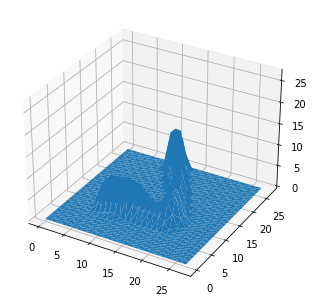

In [102]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(surface.vectors))

# Auto scale to the mesh size
scale = surface.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

Render model on graph plot^               ;                 Render Model in Blender v

recreated digit 7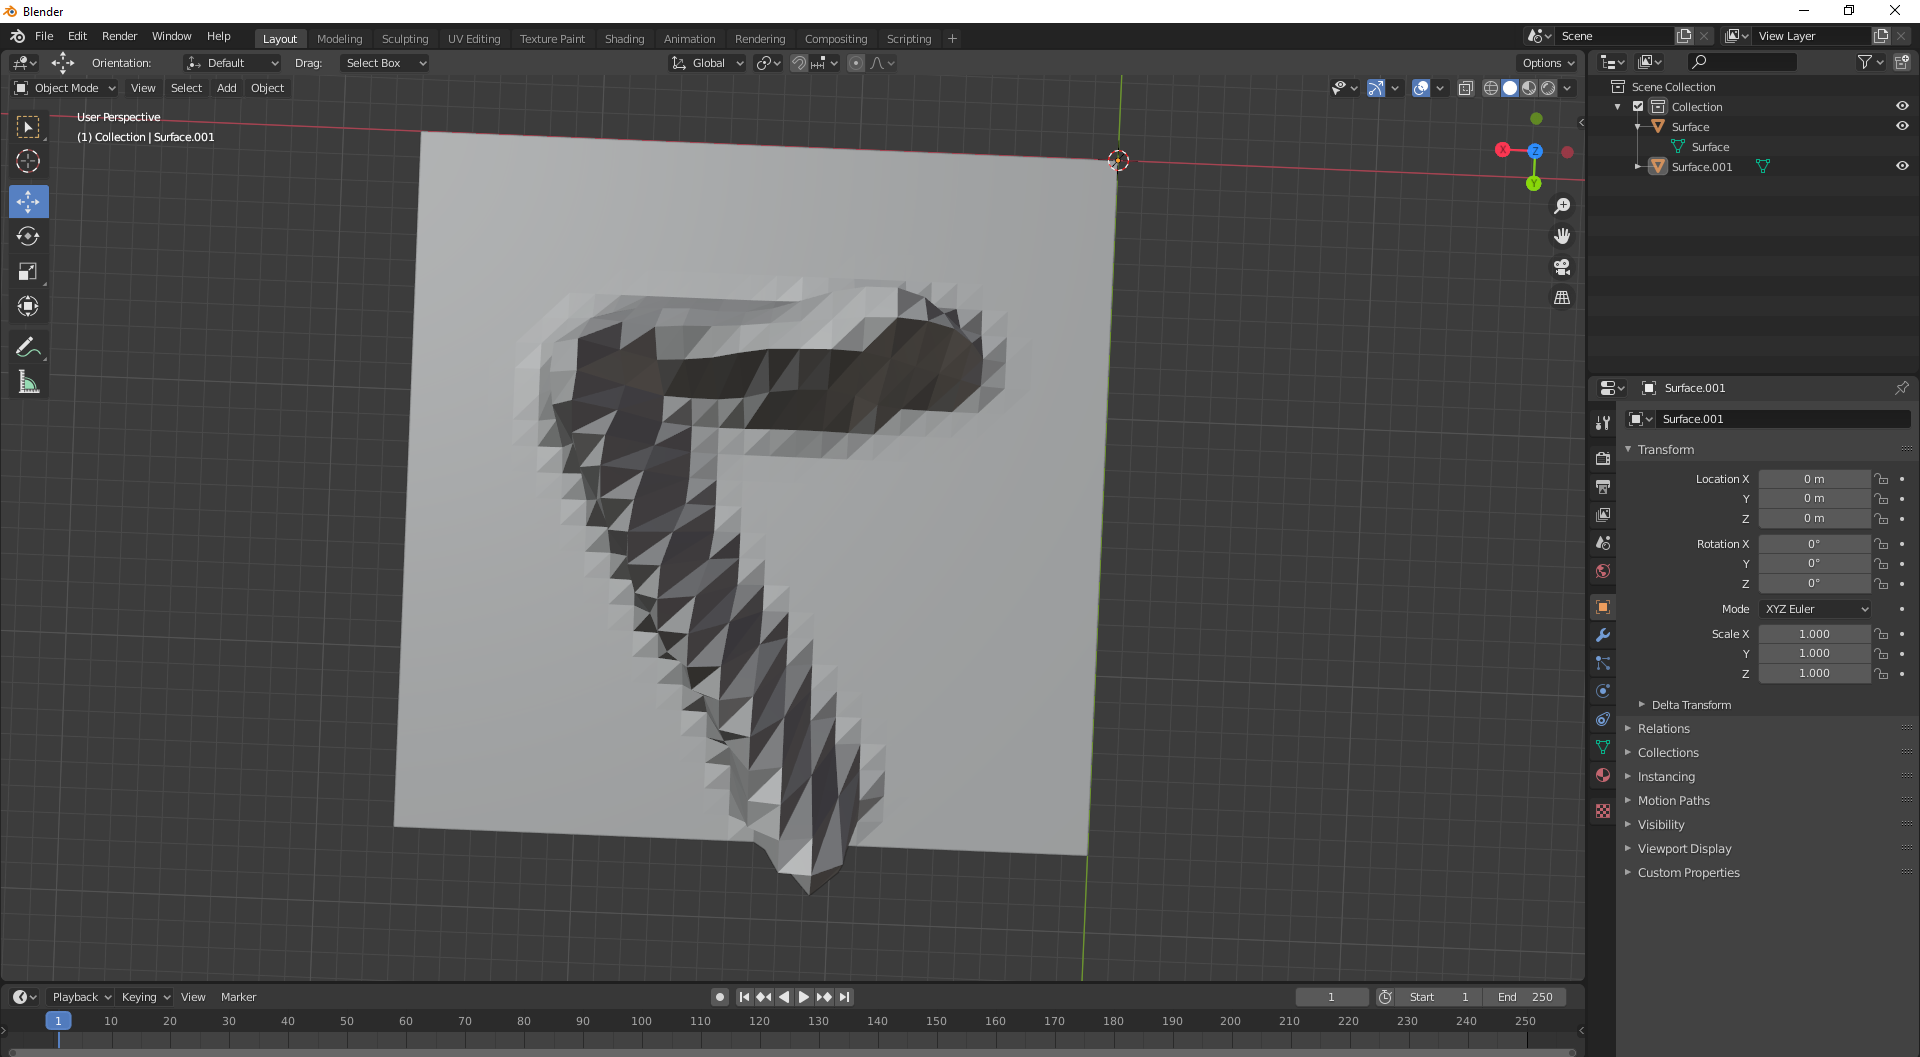

# References

https://www.machinecurve.com/index.php/2019/12/11/upsampling2d-how-to-use-upsampling-with-keras/#applying-upsampling2d-in-neural-networks

https://www.tensorflow.org/hub/tutorials/image_enhancing

https://pypi.org/project/numpy-stl/

https://youtu.be/1NS8TLwVKFc

https://pillow.readthedocs.io/en/stable/

https://chenxin.tech/files/Paper/TVCG2018_AutoSweep/AutoSweep.html

https://youtu.be/j-3vuBynnOE
